epoch 20,x1 -0.943467,x2 -0.000073


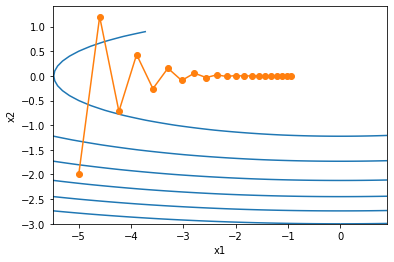

In [1]:
import matplotlib.pyplot as plt 
import torch
import d2lzh as d2l 

eta = 0.4 #learning rate

def f_2d(x1,x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1,x2,s1,s2):
    return (x1 - eta * 0.2 * x1 , x2 -  eta * 4 * x2,0,0)

d2l.show_trace_2d(f_2d,d2l.train_2d(gd_2d))

从上图可以看出，同一位置，目标函数在x2方向的梯度要比在x1方向的大，在给定的学习率的情况下，在x2方向的移动幅度要比在x1方向的大。这就需要一个较小的学习率避免在x2方向下降幅度过大导致错过最优点。但小的学习率会导致x1方向的下降比较缓慢

epoch 20,x1 -0.387814,x2 -1673.365109


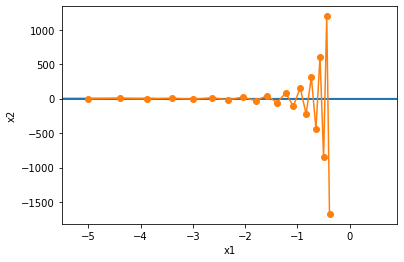

In [2]:
eta = 0.6
d2l.show_trace_2d(f_2d,d2l.train_2d(gd_2d))

上图使用较大学习率x1收敛，x2则跳过了最优点，走向发散

## 动量法

epoch 20,x1 -0.062843,x2 0.001202


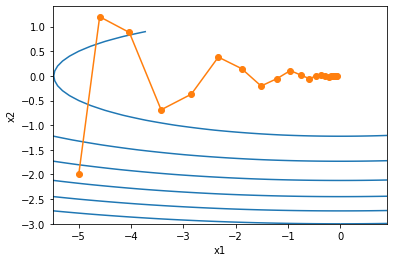

In [3]:
def momentum_2d(x1,x2,v1,v2):
    v1 = gamma * v1 + eta * 0.2 * x1
    v2 = gamma * v2 + eta * 4 * x2 
    return x1-v1,x2-v2,v1,v2

eta = 0.4
gamma = 0.5

d2l.show_trace_2d(f_2d,d2l.train_2d(momentum_2d))

epoch 20,x1 0.007188,x2 0.002553


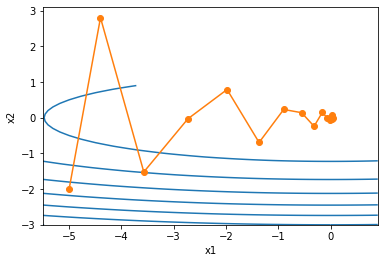

In [4]:
eta = 0.6
d2l.show_trace_2d(f_2d,d2l.train_2d(momentum_2d))

torch.Size([1500, 5])
loss: 0.245469, 0.046741 sec per epoch 


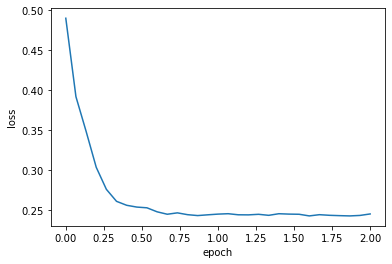

In [5]:
features,labels = d2l.get_data_ch7()
print(features.shape)

def init_momentum_states():
    v_w = torch.zeros((features.shape[1],1),dtype=torch.float32)
    v_b = torch.zeros(1,dtype=torch.float32)

    return (v_w,v_b)

def sgd_momentum(params,states,hyperparams):

    for p,v in zip(params,states):
        v.data = hyperparams["momentum"] * v.data + hyperparams["lr"] * p.grad.data
        p.data -= v.data

d2l.train_ch7(sgd_momentum,init_momentum_states(),{"lr":0.02,"momentum":0.5},features,labels)

loss: 0.267192, 0.040559 sec per epoch 


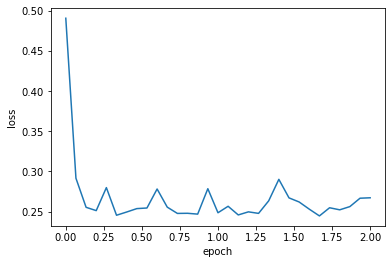

In [6]:
d2l.train_ch7(sgd_momentum,init_momentum_states(),{"lr":0.02,"momentum":0.9},features,labels)

loss: 0.244516, 0.050089 sec per epoch 


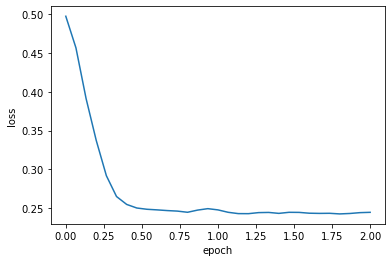

In [7]:
d2l.train_ch7(sgd_momentum,init_momentum_states(),{"lr":0.004,"momentum":0.9},features,labels)

loss: 0.243989, 0.036345 sec per epoch 


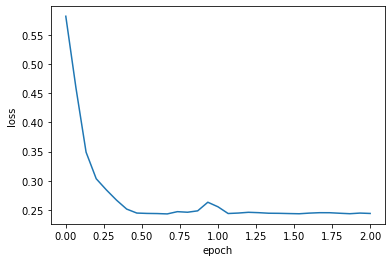

In [8]:
d2l.train_pytorch_ch7(torch.optim.SGD,{"lr":0.004,"momentum":0.9},features,labels)